# Beauty Recognition

This notebook creates a beauty classifier on the database - SCUT-FBP5500-Database

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import pickle
import os
import datetime
import cv2
import matplotlib.pyplot as plt
import numpy as np

#ai stuff
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.models import model_from_json
from keras.optimizers import Adam
from keras.layers import (Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D, BatchNormalization)
from keras.layers.core import Activation
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split


In [3]:
# Data processing

def dataset(fromid,toid):
    images = []
    labels = []
    count=1
    df = pd.read_csv(LABELS, sep=" ")
    for index, row in df.iterrows():
      
      if((index>=fromid) and (index<toid)):
        #print("is index: ",index, "between: ", fromid, " and ",toid)
        if(index%10 == 1):
          print("[process] ", index)
        filepath = IMAGES_DIR + row['filename'].replace(" ","")
        label = row['score']
        image = cv2.imread(filepath)
        image = cv2.resize(image, (250, 250))
        images_numpy = np.asarray(image, np.int16)
        labels_numpy = np.asarray(label, np.float16)
        images.append(images_numpy)
        #images.append(filepath)
        labels.append(labels_numpy)
        #if(count>20):
        # break
        count +=1
    return images, labels

In [4]:
def pickle_save(object, path):
    with open(path, "wb") as f:
        return pickle.dump(object, f)


def pickle_load(path):
    with open(path, "rb") as f:
        return pickle.load(f)

def path(filename):
    return os.path.join(DIR, filename)

def show_image(images, number_of_image):
  #image = cv2.cvtColor(images[number_of_image], cv2.COLOR_BGR2RGB) for use with cv2
  image_bgr = images[number_of_image]
  image_rgb = image_bgr[...,::-1].copy()
  imgplot = plt.imshow(image_rgb)
  plt.show()

In [5]:
# Define paths
DIR = "/content/gdrive/My Drive/Beauty_recognition/"
IMAGES_DIR = DIR + "Images/"
LABELS = DIR + "All_labels.txt"
pickeled_label_path = "labels_pickeled.pkl"
pickeled_image_path = "images_pickeled.pkl"
#only needed in case i run out of memory
pickeled_label_path_set2 = "labels_pickeled_set2.pkl"
pickeled_image_path_set2 = "images_pickeled_set2.pkl"
pickeled_label_path_set3 = "labels_pickeled_set3.pkl"
pickeled_image_path_set3 = "images_pickeled_set3.pkl"
pickeled_label_path_set4 = "labels_pickeled_set4.pkl"
pickeled_image_path_set4 = "images_pickeled_set4.pkl"

MY_IMAGES_DIR = DIR + "New_faces"
pickeled_my_images = "images_pickeled_mine.pkl"

model_path = path('model.json')
model_weight_path = path('model_weights.h5')
history_path = path('history_training.pkl')
BATCH_SIZE = 16
EPOCH = 2
TEST_SIZE = 0.15
VAL_SIZE = 0.15
FIG_SIZE = (10,7)

#Prepare the dataset

In [ ]:
#load images
#only needed once
#do this for 4 datasets

images,labels = dataset(0,6000)
print(len(images))

pickle_save(images, path(pickeled_image_path))
pickle_save(labels, path(pickeled_label_path))
print("Parsing images done set 1")

del images
del labels

print("finished with parsing")


[process]  1
[process]  11
[process]  21
[process]  31
[process]  41
[process]  51
[process]  61
[process]  71
[process]  81
[process]  91
[process]  101
[process]  111
[process]  121
[process]  131
[process]  141
[process]  151
[process]  161
[process]  171
[process]  181
[process]  191
[process]  201
[process]  211
[process]  221
[process]  231
[process]  241
[process]  251
[process]  261
[process]  271
[process]  281
[process]  291
[process]  301
[process]  311
[process]  321
[process]  331
[process]  341
[process]  351
[process]  361
[process]  371
[process]  381
[process]  391
[process]  401
[process]  411
[process]  421
[process]  431
[process]  441
[process]  451
[process]  461
[process]  471
[process]  481
[process]  491
[process]  501
[process]  511
[process]  521
[process]  531
[process]  541
[process]  551
[process]  561
[process]  571
[process]  581
[process]  591
[process]  601
[process]  611
[process]  621
[process]  631
[process]  641
[process]  651
[process]  661
[proce

In [39]:
#Prepare the dataset for my own images
import glob

my_images_list = []
for filename in glob.glob(MY_IMAGES_DIR+'/*.jpg'): #assuming jpg's
  print("processing: "+ filename)
  image = cv2.imread(filename)
  image = cv2.resize(image, (250, 250))
  images_numpy = np.asarray(image, np.int16)
  my_images_list.append(images_numpy)

my_images_list = np.array(my_images_list)

processing: /content/gdrive/My Drive/Beauty_recognition/New_faces/Rumen_Radev.jpg
processing: /content/gdrive/My Drive/Beauty_recognition/New_faces/merkel.jpg
processing: /content/gdrive/My Drive/Beauty_recognition/New_faces/joni1.jpg
processing: /content/gdrive/My Drive/Beauty_recognition/New_faces/joni2.jpg
processing: /content/gdrive/My Drive/Beauty_recognition/New_faces/joni3.jpg
processing: /content/gdrive/My Drive/Beauty_recognition/New_faces/joni4.jpg
processing: /content/gdrive/My Drive/Beauty_recognition/New_faces/joni5.jpg
processing: /content/gdrive/My Drive/Beauty_recognition/New_faces/joni6.jpg
processing: /content/gdrive/My Drive/Beauty_recognition/New_faces/miko1.jpg
processing: /content/gdrive/My Drive/Beauty_recognition/New_faces/miko2.jpg
processing: /content/gdrive/My Drive/Beauty_recognition/New_faces/ninadobrov.jpg
processing: /content/gdrive/My Drive/Beauty_recognition/New_faces/Kim_Jong.jpg
processing: /content/gdrive/My Drive/Beauty_recognition/New_faces/messi.j

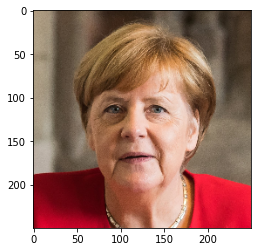

In [31]:
show_image(my_images_list,1)

In [ ]:
del images
del labels

#Load data from GoogleDrive

In [ ]:
labels_numpy = pickle_load(os.path.join(DIR, pickeled_label_path))

In [ ]:
printdf = pd.DataFrame(labels_numpy, columns = ["Schönheitsklassifizierung"])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1c94a33668>]],
      dtype=object)

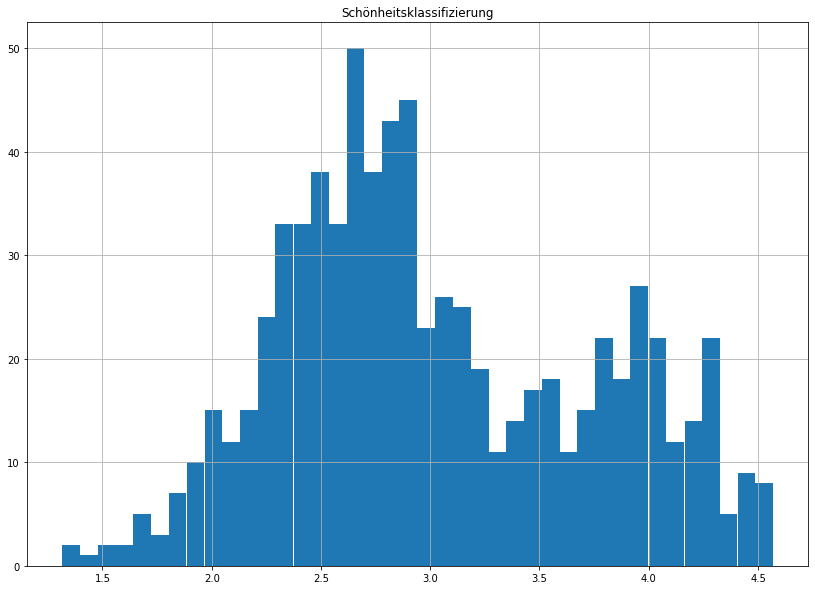

In [ ]:
printdf[4750:5499].hist(bins = 40, figsize = (14,10))

Ectracted images:  5500


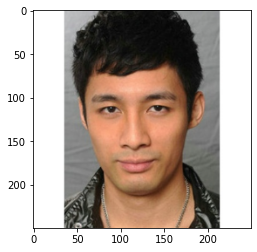

Data is a type of:  <class 'numpy.ndarray'> and  <class 'numpy.ndarray'>
Loading images done


In [ ]:
# Load numpy images from drive
labels_numpy = pickle_load(os.path.join(DIR, pickeled_label_path))
images_numpy = pickle_load(os.path.join(DIR, pickeled_image_path))

print("Ectracted images: ",len(images_numpy))

#Convert to numpy arrays
images_numpy = np.asarray(images_numpy, np.int16)
labels_numpy = np.asarray(labels_numpy, dtype=np.float16)

show_image(images_numpy,50)
print("Data is a type of: ", type(images_numpy), "and ", type(labels_numpy))


print("Loading images done")

In [ ]:
del labels_numpy
del images_numpy

# Manipulate data

In [ ]:

# Create data generator
train_datagen = ImageDataGenerator(rescale=1./255,            #rescale, value between 0-255 is too big, instead use a value 0-1
                                  vertical_flip=False,        #flips the image horizontally or vertically
                                  rotation_range=0,           #rotation range
                                  )
test_datagen = ImageDataGenerator(rescale=1./255,
                                  vertical_flip=False,
                                  rotation_range=0
                                  )
#zoom_range=[0.0,1.0],width_shift_range=0.1,height_shift_range=0.1,brightness_range=[0.9,1.0],

In [25]:
def init_model():
    # initialize alexNet model
    model = Sequential()
    # Convolutional layers
    model.add(Conv2D(kernel_size=(11, 11),
                    activation='relu',
                    strides=(4, 4),
                    filters=96,
                    padding='valid',
                    input_shape=(250,250,3)))
    model.add(MaxPooling2D(pool_size=(2, 2),
                        strides=(2, 2),
                        padding='valid'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=256,
                    kernel_size=(5, 5),
                    strides=(1, 1),
                    padding='same',
                    activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2),
                        strides=(2, 2),
                        padding='valid'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=384,
                    kernel_size=(3, 3),
                    strides=(1, 1),
                    padding='same',
                    activation='relu'))
    model.add(Conv2D(filters=384,
                    kernel_size=(3, 3),
                    strides=(1, 1),
                    padding='same',
                    activation='relu'))
    model.add(Conv2D(filters=256,
                    kernel_size=(3, 3),
                    strides=(1, 1),
                    padding='same',
                    activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2),
                        strides=(2, 2),
                        padding='valid'))
    model.add(Flatten())
    # fully connected
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1000, activation='relu'))
    # model.add(Dropout(0.5))
    # output
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mean_absolute_error',
                  optimizer=Adam(lr=1e-4),
                  metrics=['mse'])
    
    return model

#save model weights and history to Gdrive
def save_model(model, history):
    print('Saving the model ...')
    # save model structure
    with open(model_path, "w") as f:
        f.write(model.to_json())
    # save the weights and history
    model.save_weights(model_weight_path)
    pickle_save(history, history_path)
    print('Saving done')

#load model from Gdrive
def load_model():
    json_file = open(model_path, 'r')
    model = json_file.read()
    json_file.close()
    model = model_from_json(model)
    # load weights into new model
    model.load_weights(model_weight_path)
    history = pickle_load(history_path)
    return model,history

def plot_history(model_history_info, save=False):
    plt.figure(figsize=FIG_SIZE)
    plt.plot(model_history_info['loss'])
    plt.plot(model_history_info['val_loss'])
    plt.title('model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epochen')
    plt.legend(['train', 'validation'], loc='upper left')
    #saves png to file
    if(save):
        plt.savefig(DIR + 'history_of_loss.png')
    plt.show()

In [ ]:
model = init_model()
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 60, 60, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 256)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 15, 15, 256)       1024      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 384)       8

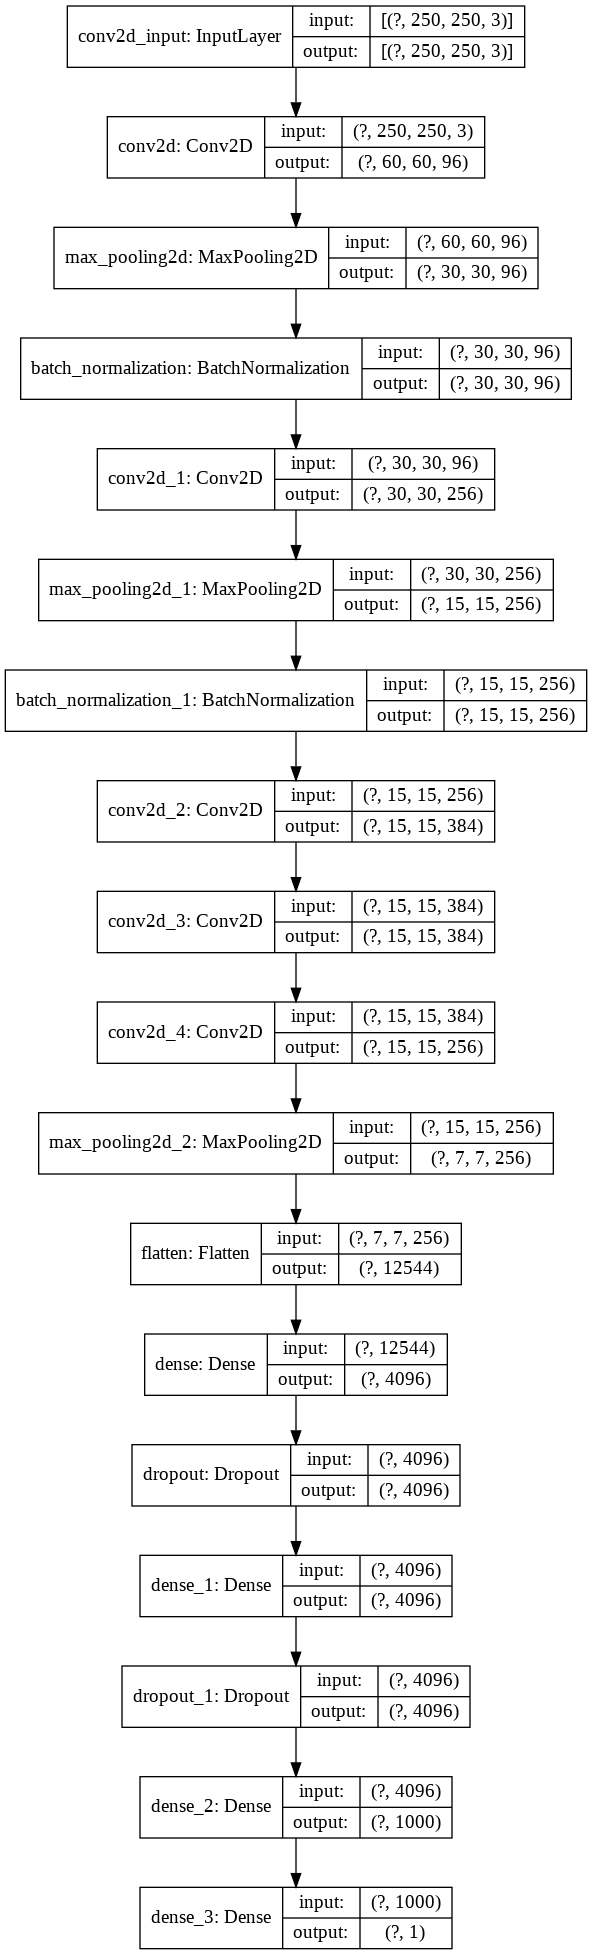

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
# split train/val
(trainX, valX, trainY, valY) = train_test_split(images_numpy,
	labels_numpy, test_size=VAL_SIZE, random_state=42)
# split train/test
(trainX, testX, trainY, testY) = train_test_split(trainX,
	trainY, test_size=TEST_SIZE, random_state=41)

print('Train ', len(trainX), ' samples', 'Test ', len(testX), ' samples')

Train  3973  samples Test  702  samples


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/40
248/248 [==============================] - 12s 47ms/step - loss: 0.6592 - mse: 0.7918 - val_loss: 0.9493 - val_mse: 1.2875
Epoch 2/40
248/248 [==============================] - 11s 44ms/step - loss: 0.5207 - mse: 0.4402 - val_loss: 0.6886 - val_mse: 0.6845
Epoch 3/40
248/248 [==============================] - 11s 44ms/step - loss: 0.4839 - mse: 0.3853 - val_loss: 0.5537 - val_mse: 0.4854
Epoch 4/40
248/248 [==============================] - 11s 44ms/step - loss: 0.4533 - mse: 0.3340 - val_loss: 0.8715 - val_mse: 0.9932
Epoch 5/40
248/248 [==============================] - 11s 44ms/step - loss: 0.4388 - mse: 0.3109 - val_loss: 0.5252 - val_mse: 0.4314
Epoch 6/40
248/248 [==============================] - 11s 44ms/step - loss: 0.4320 - mse: 0.2989 - val_loss: 0.5242 - val_mse: 0.4400
Epoch 7/40
248/248 [==============================] - 11s 44ms/step - loss: 0.4036 - mse: 0.2679 - val_loss: 0.6541 - va

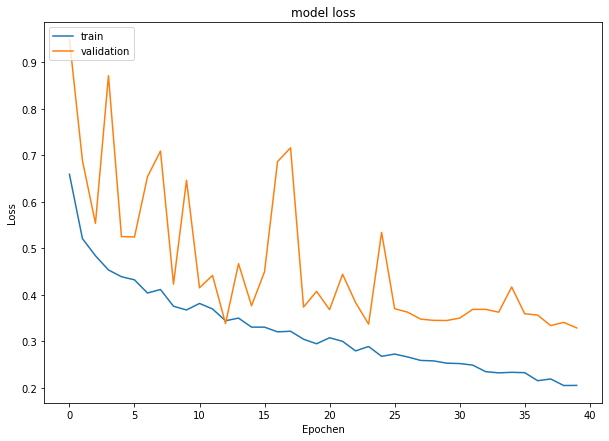

Saving the model ...
Saving done


In [ ]:
EPOCH = 40
H = model.fit_generator(
            train_datagen.flow(trainX, trainY, batch_size=BATCH_SIZE),
            steps_per_epoch=len(trainX) // BATCH_SIZE,
            epochs=EPOCH,
            validation_data=test_datagen.flow(valX, valY)
            )

model.evaluate(testX/255.0, testY)
plot_history(H.history)
save_model(model, H.history)

In [26]:
model,history = load_model()
model.compile(loss='mean_absolute_error',
                optimizer=Adam(lr=1e-4),
                metrics=['mse','accuracy'])


#r = model.evaluate(testX / 255.0, testY)
print(model.metrics_names)
#print(r)

[]


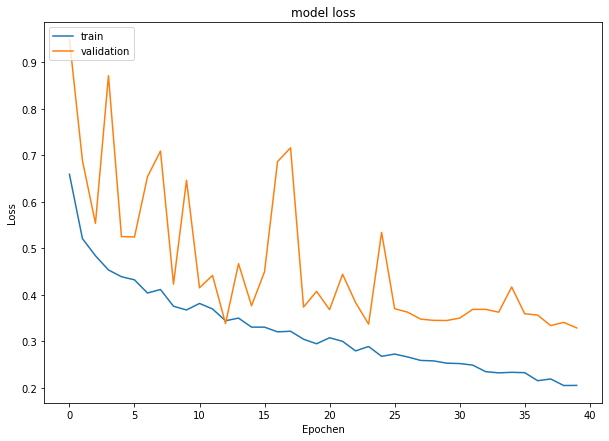

In [27]:
plot_history(history)

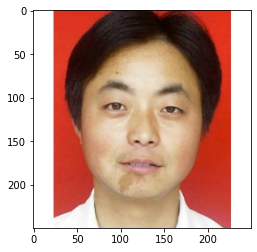

In [ ]:
someTestX = testX[20:40]
show_image(someTestX,1)

In [ ]:
len(someTestX)

20

#Get info from model

In [ ]:
#Get info from model
#average score
#predictforscores

In [76]:
from PIL import ImageDraw
from PIL import Image
from PIL import ImageFont
def print_score_on_image(image_be_printed,score_to_print):
  img = Image.open(image_be_printed)
  draw = ImageDraw.Draw(img)
  font = ImageFont.truetype("/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf", 30)   
  draw.text((0, 450),str(score_to_print),(0,0,0),font=font ) # this will draw text with Blackcolor and 16 size

  img.save("/content/gdrive/MyDrive/Beauty_recognition/rated_new_faces/"+str(score)+'.jpg')

In [77]:
print_score_on_image(MY_IMAGES_DIR+"/beauty1.jpg",predicts[0])

In [78]:
#check model
predicts = model.predict(my_images_list/255.0)


In [ ]:
#saving images with their corresponding score printed on them

images_dirs = glob.glob(MY_IMAGES_DIR+'/*.jpg')
for r,dir_image in enumerate(images_dirs):
  print_score_on_image(dir_image,predicts[r])

0  score:  [2.9815593]


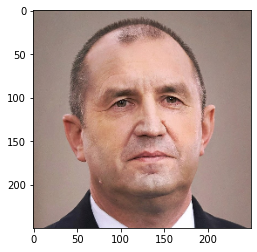

1  score:  [1.9067311]


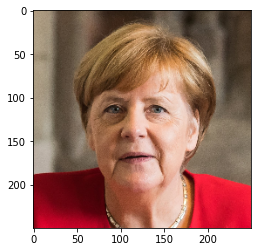

2  score:  [1.3172631]


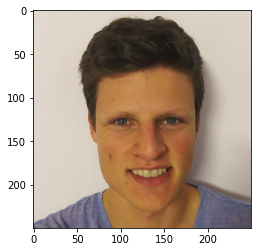

3  score:  [0.9888959]


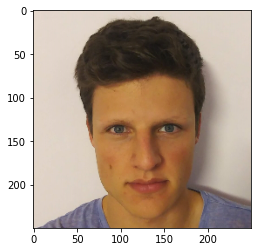

4  score:  [1.6407247]


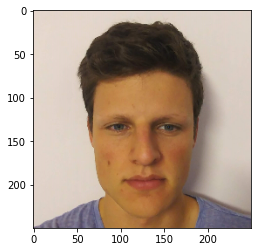

5  score:  [1.8264546]


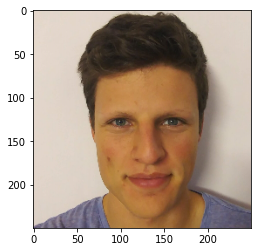

6  score:  [2.0617018]


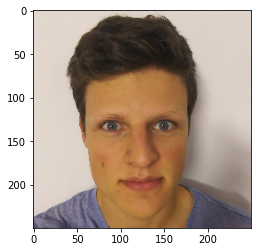

7  score:  [1.6555777]


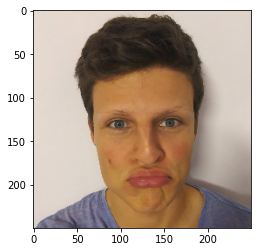

8  score:  [3.149078]


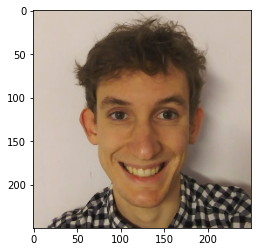

9  score:  [3.568695]


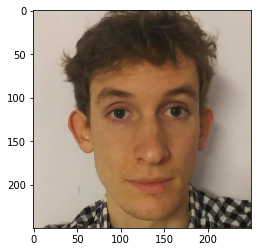

10  score:  [3.0011015]


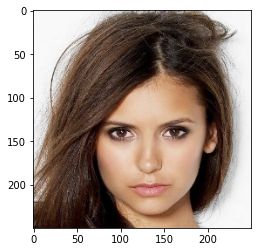

11  score:  [0.9838314]


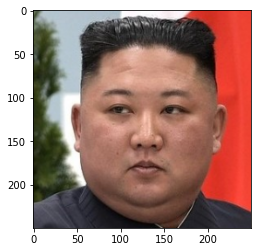

12  score:  [1.643086]


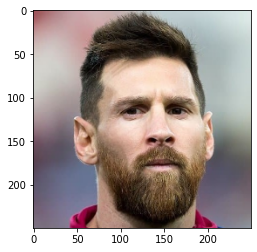

13  score:  [1.5264721]


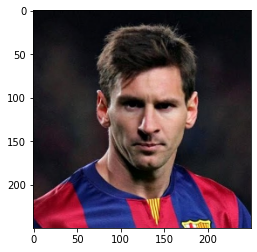

14  score:  [1.481822]


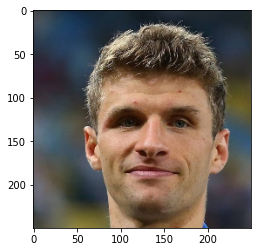

15  score:  [3.0735645]


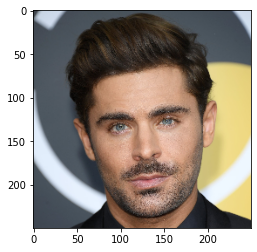

16  score:  [1.0156522]


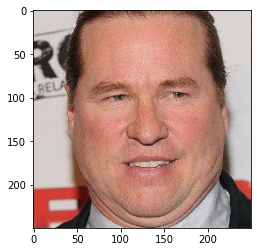

17  score:  [1.2687798]


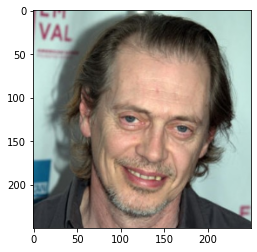

18  score:  [4.028925]


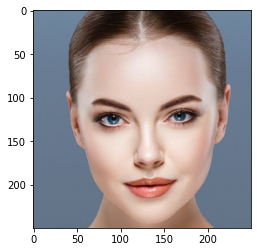

In [79]:
#showing images with their corresponding score
for index,score in enumerate(predicts):
  if score<5 or score>3.5:
    print(index," score: ",(score-2)*2)
    show_image(my_images_list,index)

Predicted beauty score:  [2.6792898]


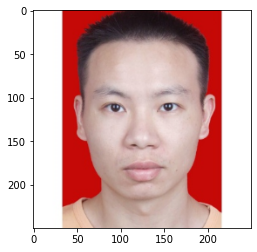

Predicted beauty score:  [2.7405338]


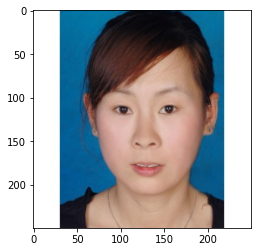

Predicted beauty score:  [3.5763016]


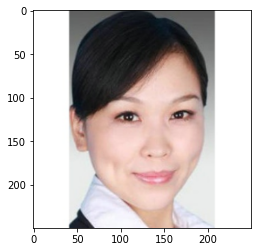

Predicted beauty score:  [2.3512235]


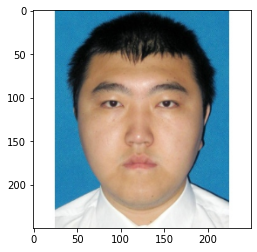

Predicted beauty score:  [2.931859]


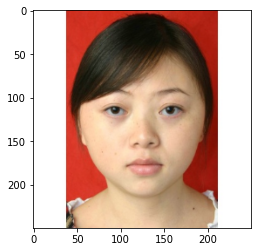

Predicted beauty score:  [3.873482]


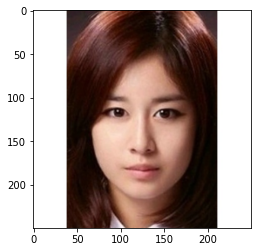

Predicted beauty score:  [2.9481704]


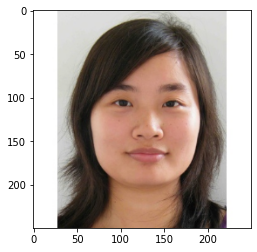

Predicted beauty score:  [2.6429071]


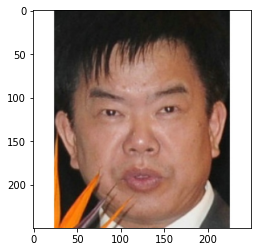

Predicted beauty score:  [2.2799594]


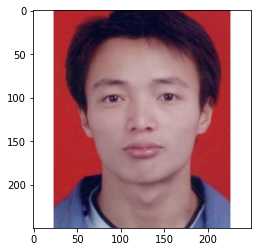

Predicted beauty score:  [2.6239514]


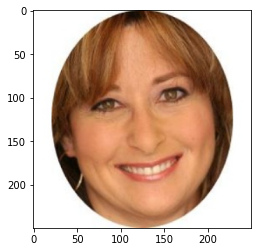

Predicted beauty score:  [2.7663817]


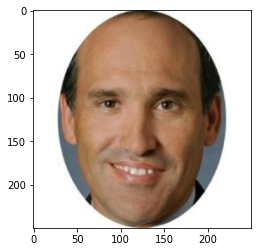

Predicted beauty score:  [3.9077096]


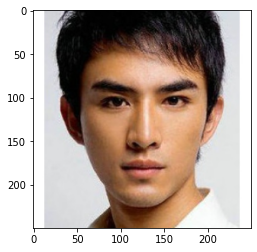

Predicted beauty score:  [3.4591532]


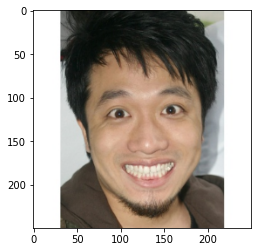

Predicted beauty score:  [2.2067833]


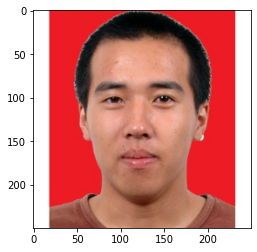

Predicted beauty score:  [3.0423756]


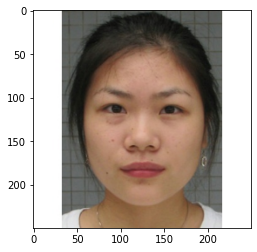

Predicted beauty score:  [3.5269063]


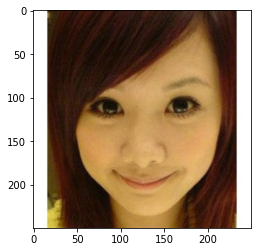

Predicted beauty score:  [3.997865]


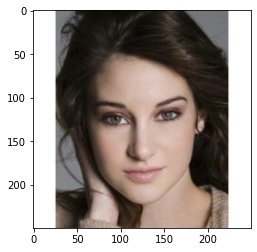

Predicted beauty score:  [2.8951976]


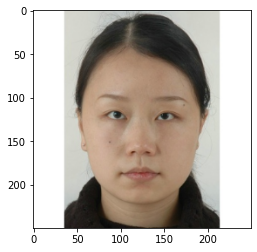

Predicted beauty score:  [2.1443956]


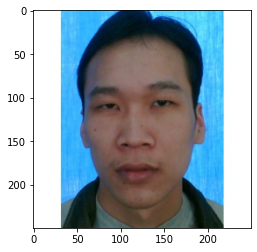

Predicted beauty score:  [2.9452329]


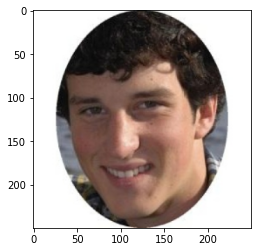

In [ ]:
predicts = model.predict(someTestX/255.0)
offset = 0
for number in range(len(predicts)):
  print("Predicted beauty score: ", predicts[number+offset])
  show_image(someTestX,number+offset)
